# Problem Set 4b_3- Frozen Lake Problem





In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random



## Load matrices

In [3]:
from scipy.io import loadmat

def load(fname):
    matdict = loadmat(fname)
    
    fl = np.array(matdict["FL"])

    flcost = np.array(matdict["FLCost"])
    return fl, flcost


FL,FL_cost  = load("matrices_4b3.mat")

n = FL_cost.shape[0]

In [4]:
#define directions
up = 0
right = 1
down = 2
left = 3
actions = ["up","right", "down", "left"]

num_actions = 4


# Look at Rewards heatmap

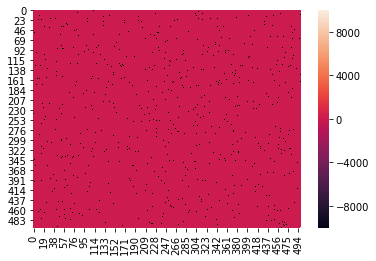

In [5]:
from seaborn import heatmap
heatmap(FL_cost)

# Define helper functions to move around in the grid

In [6]:
def get_next_action(current_state, action): 
    return (np.random.multinomial(1, FL[current_state[0], current_state[1], action, :])).argmax()

def get_next_state(current_state, action):
    if action == left:
        return (current_state[0], max(0, current_state[1]-1))
    if action == right:
        return (current_state[0], min(n-1, current_state[1]+1))
    if action == down:
        return (min(n-1, current_state[0]+1),  current_state[1])
    if action == up:
        return (max(0, current_state[0]-1),  current_state[1])
    
def step(current_state, action):
    next_action = get_next_action(current_state, action)
    next_state = get_next_state(current_state, next_action)
   
    return next_action, next_state


# Implement Q -Learning

In [17]:

#implement Q learning
lr = 0.1 #learning rate
gamma = 1 # discount factor
action_epsilon = 0.90
num_episodes = 5000 #number of iterations

Q = np.random.rand(n, n,num_actions) * 0.001


start_state = (0,0)
end_state = (n-1,n-1)
scores = []

for i in range(num_episodes):
    start_time = time.time()
    print("Now", i)
    current_state = (0,0)
    j = 0
    score = 0
    while j < 1000:
        j+=1
        #get the next action based on some probability 10% take random action, 90% take best action
        action_random_value = random.random()
        if action_random_value < action_epsilon:
            action = np.argmax(Q[current_state[0],current_state[1],:])
        else:
            action = random.randint(0,3)
        
        actual_next_action, next_state = step(current_state, action)
        reward = FL_cost[next_state[0], next_state[1]]
        current_Q = Q[current_state[0],current_state[1], action]
        Q[current_state[0],current_state[1], action] = current_Q +  lr*(reward + gamma * (np.max(Q[next_state[0], next_state[1],:]) - current_Q))
        score += reward
        current_state = next_state
        if current_state == end_state:
            print("reached end_state")
            break
    scores.append(score)
       
    print("elapsed time, ", time.time() - start_time)
            
    

Now 0
elapsed time,  0.017045974731445312
Now 1
elapsed time,  0.01215219497680664
Now 2
elapsed time,  0.015626907348632812
Now 3
elapsed time,  0.025753259658813477
Now 4
elapsed time,  0.015037775039672852
Now 5
elapsed time,  0.0020906925201416016
Now 6
elapsed time,  0.015657663345336914
Now 7
elapsed time,  0.015624761581420898
Now 8
elapsed time,  0.0
Now 9
elapsed time,  0.015629053115844727
Now 10
elapsed time,  0.015620946884155273
Now 11
elapsed time,  0.015625715255737305
Now 12
elapsed time,  0.0
Now 13
elapsed time,  0.015648841857910156
Now 14
elapsed time,  0.015610456466674805
Now 15
elapsed time,  0.018002033233642578
Now 16
elapsed time,  0.013037919998168945
Now 17
elapsed time,  0.012029886245727539
Now 18
elapsed time,  0.011032581329345703
Now 19
elapsed time,  0.012030601501464844
Now 20
elapsed time,  0.011029243469238281
Now 21
elapsed time,  0.0013244152069091797
Now 22
elapsed time,  0.01565694808959961
Now 23
elapsed time,  0.015628814697265625
Now 24
elaps

elapsed time,  0.015625953674316406
Now 200
elapsed time,  0.015332937240600586
Now 201
elapsed time,  0.014031410217285156
Now 202
elapsed time,  0.011003255844116211
Now 203
elapsed time,  0.012059926986694336
Now 204
elapsed time,  0.01200413703918457
Now 205
elapsed time,  0.012059926986694336
Now 206
elapsed time,  0.012004375457763672
Now 207
elapsed time,  0.012059450149536133
Now 208
elapsed time,  0.012018680572509766
Now 209
elapsed time,  0.01104116439819336
Now 210
elapsed time,  0.012032508850097656
Now 211
elapsed time,  0.013007164001464844
Now 212
elapsed time,  0.012043476104736328
Now 213
elapsed time,  0.011045217514038086
Now 214
elapsed time,  0.012035131454467773
Now 215
elapsed time,  0.010210037231445312
Now 216
elapsed time,  0.0
Now 217
elapsed time,  0.027807950973510742
Now 218
elapsed time,  0.013063907623291016
Now 219
elapsed time,  0.012030363082885742
Now 220
elapsed time,  0.011028766632080078
Now 221
elapsed time,  0.01100301742553711
Now 222
elapsed 

elapsed time,  0.012038946151733398
Now 418
elapsed time,  0.013007164001464844
Now 419
elapsed time,  0.014065742492675781
Now 420
elapsed time,  0.013013124465942383
Now 421
elapsed time,  0.012053966522216797
Now 422
elapsed time,  0.011028528213500977
Now 423
elapsed time,  0.013006448745727539
Now 424
elapsed time,  0.011028289794921875
Now 425
elapsed time,  0.013063669204711914
Now 426
elapsed time,  0.006291866302490234
Now 427
elapsed time,  0.01707911491394043
Now 428
elapsed time,  0.011031150817871094
Now 429
elapsed time,  0.012868642807006836
Now 430
elapsed time,  0.011029720306396484
Now 431
elapsed time,  0.012029409408569336
Now 432
elapsed time,  0.011036872863769531
Now 433
elapsed time,  0.012028694152832031
Now 434
elapsed time,  0.013033390045166016
Now 435
elapsed time,  0.01203155517578125
Now 436
elapsed time,  0.013005495071411133
Now 437
elapsed time,  0.012066364288330078
Now 438
elapsed time,  0.01400303840637207
Now 439
elapsed time,  0.01105952262878418


elapsed time,  0.013033151626586914
Now 612
elapsed time,  0.01401209831237793
Now 613
elapsed time,  0.011055469512939453
Now 614
elapsed time,  0.013034820556640625
Now 615
elapsed time,  0.012028932571411133
Now 616
elapsed time,  0.0120086669921875
Now 617
elapsed time,  0.012031793594360352
Now 618
elapsed time,  0.013035297393798828
Now 619
elapsed time,  0.011029243469238281
Now 620
elapsed time,  0.012032032012939453
Now 621
elapsed time,  0.011029958724975586
Now 622
elapsed time,  0.006172895431518555
Now 623
elapsed time,  0.015626907348632812
Now 624
elapsed time,  0.0
Now 625
elapsed time,  0.01565694808959961
Now 626
elapsed time,  0.01562643051147461
Now 627
elapsed time,  0.015630483627319336
Now 628
elapsed time,  0.0
Now 629
elapsed time,  0.02600407600402832
Now 630
elapsed time,  0.013063192367553711
Now 631
elapsed time,  0.011027097702026367
Now 632
elapsed time,  0.012036800384521484
Now 633
elapsed time,  0.012031316757202148
Now 634
elapsed time,  0.01203203201

elapsed time,  0.014037132263183594
Now 806
elapsed time,  0.014006853103637695
Now 807
elapsed time,  0.012055158615112305
Now 808
elapsed time,  0.012035369873046875
Now 809
elapsed time,  0.012032032012939453
Now 810
elapsed time,  0.011001825332641602
Now 811
elapsed time,  0.012058734893798828
Now 812
elapsed time,  0.011029720306396484
Now 813
elapsed time,  0.012031793594360352
Now 814
elapsed time,  0.011024713516235352
Now 815
elapsed time,  0.012062311172485352
Now 816
elapsed time,  0.011024951934814453
Now 817
elapsed time,  0.011049985885620117
Now 818
elapsed time,  0.012006282806396484
Now 819
elapsed time,  0.01206064224243164
Now 820
elapsed time,  0.012031793594360352
Now 821
elapsed time,  0.011029720306396484
Now 822
elapsed time,  0.012032747268676758
Now 823
elapsed time,  0.014006614685058594
Now 824
elapsed time,  0.014066696166992188
Now 825
elapsed time,  0.013031244277954102
Now 826
elapsed time,  0.01303410530090332
Now 827
elapsed time,  0.01200747489929199

elapsed time,  0.013065338134765625
Now 996
elapsed time,  0.01303243637084961
Now 997
elapsed time,  0.01300668716430664
Now 998
elapsed time,  0.013033628463745117
Now 999
elapsed time,  0.011056900024414062
Now 1000
elapsed time,  0.013033628463745117
Now 1001
elapsed time,  0.012032508850097656
Now 1002
elapsed time,  0.011029243469238281
Now 1003
elapsed time,  0.012031793594360352
Now 1004
elapsed time,  0.01102900505065918
Now 1005
elapsed time,  0.008419990539550781
Now 1006
elapsed time,  0.0
Now 1007
elapsed time,  0.015626907348632812
Now 1008
elapsed time,  0.01565694808959961
Now 1009
elapsed time,  0.01562666893005371
Now 1010
elapsed time,  0.0
Now 1011
elapsed time,  0.02618694305419922
Now 1012
elapsed time,  0.012062788009643555
Now 1013
elapsed time,  0.011024951934814453
Now 1014
elapsed time,  0.014010429382324219
Now 1015
elapsed time,  0.014037370681762695
Now 1016
elapsed time,  0.01206064224243164
Now 1017
elapsed time,  0.011030197143554688
Now 1018
elapsed ti

elapsed time,  0.014010906219482422
Now 1191
elapsed time,  0.013061046600341797
Now 1192
elapsed time,  0.011002302169799805
Now 1193
elapsed time,  0.014066934585571289
Now 1194
elapsed time,  0.013032197952270508
Now 1195
elapsed time,  0.01203155517578125
Now 1196
elapsed time,  0.013038873672485352
Now 1197
elapsed time,  0.014035463333129883
Now 1198
elapsed time,  0.011029720306396484
Now 1199
elapsed time,  0.012001752853393555
Now 1200
elapsed time,  0.012060403823852539
Now 1201
elapsed time,  0.012029409408569336
Now 1202
elapsed time,  0.012033939361572266
Now 1203
elapsed time,  0.01053619384765625
Now 1204
elapsed time,  0.0
Now 1205
elapsed time,  0.015657663345336914
Now 1206
elapsed time,  0.015625953674316406
Now 1207
elapsed time,  0.01568603515625
Now 1208
elapsed time,  0.014068603515625
Now 1209
elapsed time,  0.012027978897094727
Now 1210
elapsed time,  0.012035131454467773
Now 1211
elapsed time,  0.012009143829345703
Now 1212
elapsed time,  0.012054681777954102


Now 1387
elapsed time,  0.027620553970336914
Now 1388
elapsed time,  0.013063430786132812
Now 1389
elapsed time,  0.01104736328125
Now 1390
elapsed time,  0.012033462524414062
Now 1391
elapsed time,  0.01034402847290039
Now 1392
elapsed time,  0.0
Now 1393
elapsed time,  0.01565718650817871
Now 1394
elapsed time,  0.015627384185791016
Now 1395
elapsed time,  0.015628814697265625
Now 1396
elapsed time,  0.0
Now 1397
elapsed time,  0.01562356948852539
Now 1398
elapsed time,  0.015627384185791016
Now 1399
elapsed time,  0.0
Now 1400
elapsed time,  0.01562666893005371
Now 1401
elapsed time,  0.015626192092895508
Now 1402
elapsed time,  0.015626192092895508
Now 1403
elapsed time,  0.0
Now 1404
elapsed time,  0.015628337860107422
Now 1405
elapsed time,  0.021116971969604492
Now 1406
elapsed time,  0.013043403625488281
Now 1407
elapsed time,  0.013022899627685547
Now 1408
elapsed time,  0.011029958724975586
Now 1409
elapsed time,  0.012032032012939453
Now 1410
elapsed time,  0.011029720306396

elapsed time,  0.015625953674316406
Now 1585
elapsed time,  0.014078378677368164
Now 1586
elapsed time,  0.013030529022216797
Now 1587
elapsed time,  0.011028766632080078
Now 1588
elapsed time,  0.012035608291625977
Now 1589
elapsed time,  0.00826716423034668
Now 1590
elapsed time,  0.0
Now 1591
elapsed time,  0.015626907348632812
Now 1592
elapsed time,  0.015656709671020508
Now 1593
elapsed time,  0.015626907348632812
Now 1594
elapsed time,  0.0
Now 1595
elapsed time,  0.015629053115844727
Now 1596
elapsed time,  0.015593528747558594
Now 1597
elapsed time,  0.01565241813659668
Now 1598
elapsed time,  0.0
Now 1599
elapsed time,  0.015626192092895508
Now 1600
elapsed time,  0.015634775161743164
Now 1601
elapsed time,  0.01562356948852539
Now 1602
elapsed time,  0.014570474624633789
Now 1603
elapsed time,  0.012012481689453125
Now 1604
elapsed time,  0.01104593276977539
Now 1605
elapsed time,  0.012039661407470703
Now 1606
elapsed time,  0.009261131286621094
Now 1607
elapsed time,  0.0
N

elapsed time,  0.014038324356079102
Now 1783
elapsed time,  0.013031244277954102
Now 1784
elapsed time,  0.012033224105834961
Now 1785
elapsed time,  0.012032032012939453
Now 1786
elapsed time,  0.012032032012939453
Now 1787
elapsed time,  0.012032032012939453
Now 1788
elapsed time,  0.012031316757202148
Now 1789
elapsed time,  0.013025522232055664
Now 1790
elapsed time,  0.011038541793823242
Now 1791
elapsed time,  0.012032270431518555
Now 1792
elapsed time,  0.013035297393798828
Now 1793
elapsed time,  0.01102900505065918
Now 1794
elapsed time,  0.013035774230957031
Now 1795
elapsed time,  0.012030363082885742
Now 1796
elapsed time,  0.013036727905273438
Now 1797
elapsed time,  0.011026859283447266
Now 1798
elapsed time,  0.012032508850097656
Now 1799
elapsed time,  0.014039039611816406
Now 1800
elapsed time,  0.013032913208007812
Now 1801
elapsed time,  0.012035369873046875
Now 1802
elapsed time,  0.012059926986694336
Now 1803
elapsed time,  0.013035058975219727
Now 1804
elapsed tim

elapsed time,  0.025918006896972656
Now 1975
elapsed time,  0.013063907623291016
Now 1976
elapsed time,  0.012035131454467773
Now 1977
elapsed time,  0.012029170989990234
Now 1978
elapsed time,  0.010201692581176758
Now 1979
elapsed time,  0.0
Now 1980
elapsed time,  0.015657663345336914
Now 1981
elapsed time,  0.015625953674316406
Now 1982
elapsed time,  0.01562976837158203
Now 1983
elapsed time,  0.0
Now 1984
elapsed time,  0.015623092651367188
Now 1985
elapsed time,  0.015627145767211914
Now 1986
elapsed time,  0.01562666893005371
Now 1987
elapsed time,  0.0
Now 1988
elapsed time,  0.015629291534423828
Now 1989
elapsed time,  0.015623331069946289
Now 1990
elapsed time,  0.015627384185791016
Now 1991
elapsed time,  0.0
Now 1992
elapsed time,  0.024927616119384766
Now 1993
elapsed time,  0.01306772232055664
Now 1994
elapsed time,  0.01102590560913086
Now 1995
elapsed time,  0.012033700942993164
Now 1996
elapsed time,  0.012031316757202148
Now 1997
elapsed time,  0.012032747268676758
N

elapsed time,  0.026208877563476562
Now 2175
elapsed time,  0.013033151626586914
Now 2176
elapsed time,  0.012029647827148438
Now 2177
elapsed time,  0.011028528213500977
Now 2178
elapsed time,  0.01103067398071289
Now 2179
elapsed time,  0.002256631851196289
Now 2180
elapsed time,  0.015657663345336914
Now 2181
elapsed time,  0.015596151351928711
Now 2182
elapsed time,  0.01562666893005371
Now 2183
elapsed time,  0.01562809944152832
Now 2184
elapsed time,  0.015625
Now 2185
elapsed time,  0.015627384185791016
Now 2186
elapsed time,  0.015626907348632812
Now 2187
elapsed time,  0.0
Now 2188
elapsed time,  0.015626907348632812
Now 2189
elapsed time,  0.015625476837158203
Now 2190
elapsed time,  0.025693416595458984
Now 2191
elapsed time,  0.01303410530090332
Now 2192
elapsed time,  0.012061834335327148
Now 2193
elapsed time,  0.011028051376342773
Now 2194
elapsed time,  0.012030363082885742
Now 2195
elapsed time,  0.01203298568725586
Now 2196
elapsed time,  0.005361080169677734
Now 2197

elapsed time,  0.012010812759399414
Now 2375
elapsed time,  0.013035774230957031
Now 2376
elapsed time,  0.013062238693237305
Now 2377
elapsed time,  0.012003898620605469
Now 2378
elapsed time,  0.012060403823852539
Now 2379
elapsed time,  0.012004613876342773
Now 2380
elapsed time,  0.01205897331237793
Now 2381
elapsed time,  0.013036966323852539
Now 2382
elapsed time,  0.012026309967041016
Now 2383
elapsed time,  0.012049674987792969
Now 2384
elapsed time,  0.012017011642456055
Now 2385
elapsed time,  0.012038946151733398
Now 2386
elapsed time,  0.013028383255004883
Now 2387
elapsed time,  0.021030664443969727
Now 2388
elapsed time,  0.018047809600830078
Now 2389
elapsed time,  0.016065359115600586
Now 2390
elapsed time,  0.015043258666992188
Now 2391
elapsed time,  0.01201629638671875
Now 2392
elapsed time,  0.012047290802001953
Now 2393
elapsed time,  0.013036727905273438
Now 2394
elapsed time,  0.013032674789428711
Now 2395
elapsed time,  0.01200556755065918
Now 2396
elapsed time,

elapsed time,  0.015622377395629883
Now 2578
elapsed time,  0.015631914138793945
Now 2579
elapsed time,  0.015625476837158203
Now 2580
elapsed time,  0.0
Now 2581
elapsed time,  0.015624284744262695
Now 2582
elapsed time,  0.01562976837158203
Now 2583
elapsed time,  0.0
Now 2584
elapsed time,  0.01562809944152832
Now 2585
elapsed time,  0.015624284744262695
Now 2586
elapsed time,  0.015624046325683594
Now 2587
elapsed time,  0.0
Now 2588
elapsed time,  0.01562976837158203
Now 2589
elapsed time,  0.01562643051147461
Now 2590
elapsed time,  0.015625953674316406
Now 2591
elapsed time,  0.0
Now 2592
elapsed time,  0.015627384185791016
Now 2593
elapsed time,  0.01562666893005371
Now 2594
elapsed time,  0.015626192092895508
Now 2595
elapsed time,  0.0
Now 2596
elapsed time,  0.015639305114746094
Now 2597
elapsed time,  0.015613794326782227
Now 2598
elapsed time,  0.015626907348632812
Now 2599
elapsed time,  0.0
Now 2600
elapsed time,  0.01562809944152832
Now 2601
elapsed time,  0.01562523841

elapsed time,  0.015628337860107422
Now 2784
elapsed time,  0.0
Now 2785
elapsed time,  0.015607595443725586
Now 2786
elapsed time,  0.015644311904907227
Now 2787
elapsed time,  0.01564478874206543
Now 2788
elapsed time,  0.015604019165039062
Now 2789
elapsed time,  0.0
Now 2790
elapsed time,  0.015603065490722656
Now 2791
elapsed time,  0.015650510787963867
Now 2792
elapsed time,  0.015602588653564453
Now 2793
elapsed time,  0.0
Now 2794
elapsed time,  0.015650510787963867
Now 2795
elapsed time,  0.015627622604370117
Now 2796
elapsed time,  0.015625476837158203
Now 2797
elapsed time,  0.0
Now 2798
elapsed time,  0.02464914321899414
Now 2799
elapsed time,  0.013064861297607422
Now 2800
elapsed time,  0.018017292022705078
Now 2801
elapsed time,  0.013061046600341797
Now 2802
elapsed time,  0.013039350509643555
Now 2803
elapsed time,  0.012033700942993164
Now 2804
elapsed time,  0.013002634048461914
Now 2805
elapsed time,  0.012058258056640625
Now 2806
elapsed time,  0.013036727905273438

elapsed time,  0.01400899887084961
Now 2984
elapsed time,  0.013057947158813477
Now 2985
elapsed time,  0.012034177780151367
Now 2986
elapsed time,  0.012032270431518555
Now 2987
elapsed time,  0.013035058975219727
Now 2988
elapsed time,  0.012035846710205078
Now 2989
elapsed time,  0.012001752853393555
Now 2990
elapsed time,  0.013060569763183594
Now 2991
elapsed time,  0.012032032012939453
Now 2992
elapsed time,  0.012033700942993164
Now 2993
elapsed time,  0.013016939163208008
Now 2994
elapsed time,  0.012058734893798828
Now 2995
elapsed time,  0.013007640838623047
Now 2996
elapsed time,  0.013034582138061523
Now 2997
elapsed time,  0.014037370681762695
Now 2998
elapsed time,  0.013034582138061523
Now 2999
elapsed time,  0.0130615234375
Now 3000
elapsed time,  0.013034343719482422
Now 3001
elapsed time,  0.011028528213500977
Now 3002
elapsed time,  0.013008594512939453
Now 3003
elapsed time,  0.012057781219482422
Now 3004
elapsed time,  0.012029647827148438
Now 3005
elapsed time,  0

elapsed time,  0.01999974250793457
Now 3188
elapsed time,  0.014037370681762695
Now 3189
elapsed time,  0.012031793594360352
Now 3190
elapsed time,  0.012027502059936523
Now 3191
elapsed time,  0.013006210327148438
Now 3192
elapsed time,  0.012060880661010742
Now 3193
elapsed time,  0.012033224105834961
Now 3194
elapsed time,  0.013034582138061523
Now 3195
elapsed time,  0.013004779815673828
Now 3196
elapsed time,  0.011062145233154297
Now 3197
elapsed time,  0.012031316757202148
Now 3198
elapsed time,  0.013033390045166016
Now 3199
elapsed time,  0.012002706527709961
Now 3200
elapsed time,  0.011049270629882812
Now 3201
elapsed time,  0.013034343719482422
Now 3202
elapsed time,  0.01202845573425293
Now 3203
elapsed time,  0.012037992477416992
Now 3204
elapsed time,  0.013062000274658203
Now 3205
elapsed time,  0.013031959533691406
Now 3206
elapsed time,  0.012032747268676758
Now 3207
elapsed time,  0.011033296585083008
Now 3208
elapsed time,  0.012027263641357422
Now 3209
elapsed time

elapsed time,  0.015033245086669922
Now 3375
elapsed time,  0.012015819549560547
Now 3376
elapsed time,  0.012048006057739258
Now 3377
elapsed time,  0.012033224105834961
Now 3378
elapsed time,  0.013036727905273438
Now 3379
elapsed time,  0.011000394821166992
Now 3380
elapsed time,  0.013033390045166016
Now 3381
elapsed time,  0.013067007064819336
Now 3382
elapsed time,  0.012029647827148438
Now 3383
elapsed time,  0.012188434600830078
Now 3384
elapsed time,  0.0
Now 3385
elapsed time,  0.01565837860107422
Now 3386
elapsed time,  0.015625715255737305
Now 3387
elapsed time,  0.0
Now 3388
elapsed time,  0.015600442886352539
Now 3389
elapsed time,  0.025762081146240234
Now 3390
elapsed time,  0.02005481719970703
Now 3391
elapsed time,  0.014054298400878906
Now 3392
elapsed time,  0.013043880462646484
Now 3393
elapsed time,  0.012036561965942383
Now 3394
elapsed time,  0.015012025833129883
Now 3395
elapsed time,  0.012054920196533203
Now 3396
elapsed time,  0.014010906219482422
Now 3397
e

elapsed time,  0.011028289794921875
Now 3576
elapsed time,  0.01303410530090332
Now 3577
elapsed time,  0.014068365097045898
Now 3578
elapsed time,  0.012033224105834961
Now 3579
elapsed time,  0.012031793594360352
Now 3580
elapsed time,  0.012030839920043945
Now 3581
elapsed time,  0.013060331344604492
Now 3582
elapsed time,  0.012035846710205078
Now 3583
elapsed time,  0.012003421783447266
Now 3584
elapsed time,  0.013060808181762695
Now 3585
elapsed time,  0.013036489486694336
Now 3586
elapsed time,  0.01202845573425293
Now 3587
elapsed time,  0.012007474899291992
Now 3588
elapsed time,  0.01306295394897461
Now 3589
elapsed time,  0.013032197952270508
Now 3590
elapsed time,  0.013034343719482422
Now 3591
elapsed time,  0.014040470123291016
Now 3592
elapsed time,  0.013034343719482422
Now 3593
elapsed time,  0.013062238693237305
Now 3594
elapsed time,  0.012060403823852539
Now 3595
elapsed time,  0.014033317565917969
Now 3596
elapsed time,  0.012006998062133789
Now 3597
elapsed time,

elapsed time,  0.015627145767211914
Now 3779
elapsed time,  0.0
Now 3780
elapsed time,  0.026881933212280273
Now 3781
elapsed time,  0.013036966323852539
Now 3782
elapsed time,  0.012090444564819336
Now 3783
elapsed time,  0.0
Now 3784
elapsed time,  0.02507948875427246
Now 3785
elapsed time,  0.011028289794921875
Now 3786
elapsed time,  0.013035774230957031
Now 3787
elapsed time,  0.011027097702026367
Now 3788
elapsed time,  0.006028175354003906
Now 3789
elapsed time,  0.015653610229492188
Now 3790
elapsed time,  0.0
Now 3791
elapsed time,  0.015625953674316406
Now 3792
elapsed time,  0.015628814697265625
Now 3793
elapsed time,  0.017994165420532227
Now 3794
elapsed time,  0.01102900505065918
Now 3795
elapsed time,  0.008146524429321289
Now 3796
elapsed time,  0.01562666893005371
Now 3797
elapsed time,  0.0
Now 3798
elapsed time,  0.015657901763916016
Now 3799
elapsed time,  0.020942211151123047
Now 3800
elapsed time,  0.014070272445678711
Now 3801
elapsed time,  0.011024236679077148


elapsed time,  0.013011932373046875
Now 3970
elapsed time,  0.013057708740234375
Now 3971
elapsed time,  0.011034250259399414
Now 3972
elapsed time,  0.013036251068115234
Now 3973
elapsed time,  0.012001991271972656
Now 3974
elapsed time,  0.012060165405273438
Now 3975
elapsed time,  0.014036417007446289
Now 3976
elapsed time,  0.013033628463745117
Now 3977
elapsed time,  0.012033224105834961
Now 3978
elapsed time,  0.011031627655029297
Now 3979
elapsed time,  0.013033390045166016
Now 3980
elapsed time,  0.012033700942993164
Now 3981
elapsed time,  0.012030363082885742
Now 3982
elapsed time,  0.012033224105834961
Now 3983
elapsed time,  0.013004541397094727
Now 3984
elapsed time,  0.014037609100341797
Now 3985
elapsed time,  0.01506662368774414
Now 3986
elapsed time,  0.013008594512939453
Now 3987
elapsed time,  0.012058496475219727
Now 3988
elapsed time,  0.013007164001464844
Now 3989
elapsed time,  0.011058330535888672
Now 3990
elapsed time,  0.012032747268676758
Now 3991
elapsed tim

elapsed time,  0.015014171600341797
Now 4160
elapsed time,  0.015038728713989258
Now 4161
elapsed time,  0.013035058975219727
Now 4162
elapsed time,  0.013064146041870117
Now 4163
elapsed time,  0.015038013458251953
Now 4164
elapsed time,  0.012056350708007812
Now 4165
elapsed time,  0.01203465461730957
Now 4166
elapsed time,  0.014008760452270508
Now 4167
elapsed time,  0.015052080154418945
Now 4168
elapsed time,  0.014039993286132812
Now 4169
elapsed time,  0.013031482696533203
Now 4170
elapsed time,  0.013005256652832031
Now 4171
elapsed time,  0.015053749084472656
Now 4172
elapsed time,  0.014024734497070312
Now 4173
elapsed time,  0.013061046600341797
Now 4174
elapsed time,  0.013034820556640625
Now 4175
elapsed time,  0.014039039611816406
Now 4176
elapsed time,  0.013033390045166016
Now 4177
elapsed time,  0.013035297393798828
Now 4178
elapsed time,  0.01303410530090332
Now 4179
elapsed time,  0.014068603515625
Now 4180
elapsed time,  0.013003349304199219
Now 4181
elapsed time,  

elapsed time,  0.013006925582885742
Now 4354
elapsed time,  0.012061595916748047
Now 4355
elapsed time,  0.014037370681762695
Now 4356
elapsed time,  0.014033317565917969
Now 4357
elapsed time,  0.012033700942993164
Now 4358
elapsed time,  0.013026714324951172
Now 4359
elapsed time,  0.01304769515991211
Now 4360
elapsed time,  0.014023542404174805
Now 4361
elapsed time,  0.013051986694335938
Now 4362
elapsed time,  0.012000322341918945
Now 4363
elapsed time,  0.013034582138061523
Now 4364
elapsed time,  0.01305699348449707
Now 4365
elapsed time,  0.012038946151733398
Now 4366
elapsed time,  0.014015674591064453
Now 4367
elapsed time,  0.012024402618408203
Now 4368
elapsed time,  0.013063669204711914
Now 4369
elapsed time,  0.014034509658813477
Now 4370
elapsed time,  0.013007879257202148
Now 4371
elapsed time,  0.012064218521118164
Now 4372
elapsed time,  0.012026071548461914
Now 4373
elapsed time,  0.013034343719482422
Now 4374
elapsed time,  0.011029958724975586
Now 4375
elapsed time

elapsed time,  0.015657901763916016
Now 4541
elapsed time,  0.015624284744262695
Now 4542
elapsed time,  0.01562786102294922
Now 4543
elapsed time,  0.0
Now 4544
elapsed time,  0.015635013580322266
Now 4545
elapsed time,  0.015619039535522461
Now 4546
elapsed time,  0.015627622604370117
Now 4547
elapsed time,  0.0
Now 4548
elapsed time,  0.015625
Now 4549
elapsed time,  0.015626907348632812
Now 4550
elapsed time,  0.015626192092895508
Now 4551
elapsed time,  0.0
Now 4552
elapsed time,  0.015626907348632812
Now 4553
elapsed time,  0.020495891571044922
Now 4554
elapsed time,  0.012032508850097656
Now 4555
elapsed time,  0.012010335922241211
Now 4556
elapsed time,  0.009096145629882812
Now 4557
elapsed time,  0.0
Now 4558
elapsed time,  0.01563429832458496
Now 4559
elapsed time,  0.015650510787963867
Now 4560
elapsed time,  0.022607803344726562
Now 4561
elapsed time,  0.012060880661010742
Now 4562
elapsed time,  0.007413625717163086
Now 4563
elapsed time,  0.0
Now 4564
elapsed time,  0.02

elapsed time,  0.015039682388305664
Now 4747
elapsed time,  0.012029170989990234
Now 4748
elapsed time,  0.013021230697631836
Now 4749
elapsed time,  0.013051033020019531
Now 4750
elapsed time,  0.012001276016235352
Now 4751
elapsed time,  0.0130615234375
Now 4752
elapsed time,  0.012032747268676758
Now 4753
elapsed time,  0.015012264251708984
Now 4754
elapsed time,  0.0140380859375
Now 4755
elapsed time,  0.013034343719482422
Now 4756
elapsed time,  0.012061357498168945
Now 4757
elapsed time,  0.013035058975219727
Now 4758
elapsed time,  0.012025117874145508
Now 4759
elapsed time,  0.01301264762878418
Now 4760
elapsed time,  0.012031316757202148
Now 4761
elapsed time,  0.012063980102539062
Now 4762
elapsed time,  0.014031171798706055
Now 4763
elapsed time,  0.01504206657409668
Now 4764
elapsed time,  0.013007402420043945
Now 4765
elapsed time,  0.01205897331237793
Now 4766
elapsed time,  0.013034582138061523
Now 4767
elapsed time,  0.013034343719482422
Now 4768
elapsed time,  0.014010

elapsed time,  0.02489924430847168
Now 4933
elapsed time,  0.013033390045166016
Now 4934
elapsed time,  0.011029243469238281
Now 4935
elapsed time,  0.013036489486694336
Now 4936
elapsed time,  0.013004302978515625
Now 4937
elapsed time,  0.012031078338623047
Now 4938
elapsed time,  0.013064384460449219
Now 4939
elapsed time,  0.012001991271972656
Now 4940
elapsed time,  0.012061357498168945
Now 4941
elapsed time,  0.01203465461730957
Now 4942
elapsed time,  0.01203012466430664
Now 4943
elapsed time,  0.012033462524414062
Now 4944
elapsed time,  0.012030839920043945
Now 4945
elapsed time,  0.01203298568725586
Now 4946
elapsed time,  0.012029886245727539
Now 4947
elapsed time,  0.012033462524414062
Now 4948
elapsed time,  0.013033390045166016
Now 4949
elapsed time,  0.011030912399291992
Now 4950
elapsed time,  0.013035297393798828
Now 4951
elapsed time,  0.012029647827148438
Now 4952
elapsed time,  0.012032032012939453
Now 4953
elapsed time,  0.012033462524414062
Now 4954
elapsed time, 

## Lets see the heatmap of Q values

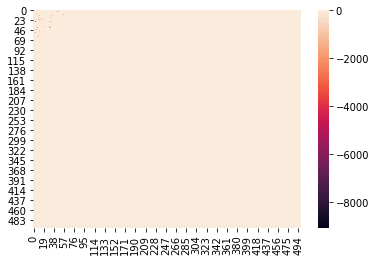

In [18]:
heatmap(Q.max(2))

# Learning rate

c:\python35\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  after removing the cwd from sys.path.


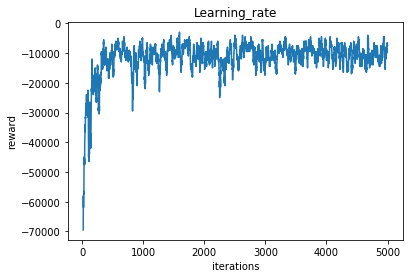

In [20]:
import pandas as pd
scores = np.array(scores)
itr = range(len(scores))
av_scores = pd.rolling_mean(scores,20)

plt.xlabel("iterations")
plt.ylabel("reward")
plt.title("Learning_rate")
plt.plot(itr, av_scores)
plt.show()

# Determine the policy

In [10]:
policy = Q.argmax(2)
policy

array([[3, 3, 1, ..., 2, 3, 2],
       [0, 1, 1, ..., 2, 3, 1],
       [1, 3, 3, ..., 3, 0, 2],
       ..., 
       [0, 3, 3, ..., 2, 0, 3],
       [1, 0, 2, ..., 0, 0, 1],
       [3, 1, 3, ..., 0, 3, 3]], dtype=int64)

# Test the policy

In [12]:
#test policy
start_state = (0,0)
end_state= (n-1,n-1)
current_state = (0,0)

while current_state != end_state:
    action = policy[current_state[0], current_state[1]]
    actual_next_action, next_state = step(current_state, action)
    print("current_state", current_state, "action", actions[action], "actual_action", actions[actual_next_action])
    current_state = next_state

current_state (0, 0) action left actual_action right
current_state (0, 1) action left actual_action right
current_state (0, 2) action right actual_action down
current_state (1, 2) action right actual_action up
current_state (0, 2) action right actual_action right
current_state (0, 3) action right actual_action down
current_state (1, 3) action right actual_action down
current_state (2, 3) action down actual_action right
current_state (2, 4) action left actual_action down
current_state (3, 4) action left actual_action left
current_state (3, 3) action up actual_action left
current_state (3, 2) action left actual_action right
current_state (3, 3) action up actual_action left
current_state (3, 2) action left actual_action down
current_state (4, 2) action down actual_action down
current_state (5, 2) action right actual_action down
current_state (6, 2) action left actual_action left
current_state (6, 1) action left actual_action up
current_state (5, 1) action down actual_action right
current_

current_state (14, 2) action up actual_action down
current_state (15, 2) action up actual_action up
current_state (14, 2) action up actual_action left
current_state (14, 1) action down actual_action down
current_state (15, 1) action down actual_action right
current_state (15, 2) action up actual_action left
current_state (15, 1) action down actual_action up
current_state (14, 1) action down actual_action left
current_state (14, 0) action right actual_action right
current_state (14, 1) action down actual_action left
current_state (14, 0) action right actual_action right
current_state (14, 1) action down actual_action up
current_state (13, 1) action down actual_action up
current_state (12, 1) action right actual_action left
current_state (12, 0) action down actual_action right
current_state (12, 1) action right actual_action down
current_state (13, 1) action down actual_action left
current_state (13, 0) action left actual_action up
current_state (12, 0) action down actual_action right
cu

current_state (38, 17) action down actual_action up
current_state (37, 17) action up actual_action up
current_state (36, 17) action right actual_action down
current_state (37, 17) action up actual_action up
current_state (36, 17) action right actual_action left
current_state (36, 16) action down actual_action up
current_state (35, 16) action right actual_action up
current_state (34, 16) action left actual_action left
current_state (34, 15) action left actual_action down
current_state (35, 15) action right actual_action up
current_state (34, 15) action left actual_action left
current_state (34, 14) action left actual_action down
current_state (35, 14) action up actual_action down
current_state (36, 14) action right actual_action down
current_state (37, 14) action left actual_action down
current_state (38, 14) action up actual_action left
current_state (38, 13) action down actual_action up
current_state (37, 13) action right actual_action left
current_state (37, 12) action down actual_ac

current_state (42, 2) action up actual_action left
current_state (42, 1) action right actual_action right
current_state (42, 2) action up actual_action up
current_state (41, 2) action left actual_action down
current_state (42, 2) action up actual_action left
current_state (42, 1) action right actual_action up
current_state (41, 1) action left actual_action left
current_state (41, 0) action left actual_action right
current_state (41, 1) action left actual_action left
current_state (41, 0) action left actual_action down
current_state (42, 0) action left actual_action up
current_state (41, 0) action left actual_action right
current_state (41, 1) action left actual_action up
current_state (40, 1) action right actual_action left
current_state (40, 0) action down actual_action up
current_state (39, 0) action up actual_action right
current_state (39, 1) action right actual_action down
current_state (40, 1) action right actual_action left
current_state (40, 0) action down actual_action down
cu

current_state (36, 0) action left actual_action right
current_state (36, 1) action up actual_action down
current_state (37, 1) action down actual_action down
current_state (38, 1) action down actual_action up
current_state (37, 1) action down actual_action down
current_state (38, 1) action down actual_action left
current_state (38, 0) action up actual_action up
current_state (37, 0) action up actual_action up
current_state (36, 0) action left actual_action right
current_state (36, 1) action up actual_action down
current_state (37, 1) action down actual_action left
current_state (37, 0) action up actual_action up
current_state (36, 0) action left actual_action up
current_state (35, 0) action up actual_action down
current_state (36, 0) action left actual_action up
current_state (35, 0) action up actual_action down
current_state (36, 0) action left actual_action right
current_state (36, 1) action up actual_action left
current_state (36, 0) action left actual_action right
current_state (36

current_state (34, 3) action right actual_action right
current_state (34, 4) action up actual_action up
current_state (33, 4) action left actual_action down
current_state (34, 4) action up actual_action down
current_state (35, 4) action left actual_action down
current_state (36, 4) action left actual_action left
current_state (36, 3) action left actual_action left
current_state (36, 2) action left actual_action up
current_state (35, 2) action down actual_action down
current_state (36, 2) action left actual_action down
current_state (37, 2) action up actual_action left
current_state (37, 1) action down actual_action left
current_state (37, 0) action up actual_action right
current_state (37, 1) action down actual_action down
current_state (38, 1) action down actual_action down
current_state (39, 1) action right actual_action down
current_state (40, 1) action right actual_action left
current_state (40, 0) action down actual_action down
current_state (41, 0) action left actual_action down


current_state (52, 20) action left actual_action left
current_state (52, 19) action up actual_action down
current_state (53, 19) action left actual_action up
current_state (52, 19) action up actual_action down
current_state (53, 19) action left actual_action up
current_state (52, 19) action up actual_action down
current_state (53, 19) action left actual_action right
current_state (53, 20) action up actual_action left
current_state (53, 19) action left actual_action left
current_state (53, 18) action up actual_action down
current_state (54, 18) action left actual_action right
current_state (54, 19) action up actual_action right
current_state (54, 20) action up actual_action right
current_state (54, 21) action up actual_action down
current_state (55, 21) action down actual_action left
current_state (55, 20) action up actual_action up
current_state (54, 20) action up actual_action down
current_state (55, 20) action up actual_action down
current_state (56, 20) action right actual_action le

current_state (56, 21) action up actual_action left
current_state (56, 20) action right actual_action right
current_state (56, 21) action up actual_action left
current_state (56, 20) action right actual_action right
current_state (56, 21) action up actual_action left
current_state (56, 20) action right actual_action left
current_state (56, 19) action right actual_action left
current_state (56, 18) action up actual_action left
current_state (56, 17) action up actual_action up
current_state (55, 17) action right actual_action right
current_state (55, 18) action up actual_action left
current_state (55, 17) action right actual_action left
current_state (55, 16) action up actual_action up
current_state (54, 16) action right actual_action left
current_state (54, 15) action up actual_action down
current_state (55, 15) action right actual_action right
current_state (55, 16) action up actual_action up
current_state (54, 16) action right actual_action up
current_state (53, 16) action down actual

current_state (41, 38) action left actual_action left
current_state (41, 37) action left actual_action left
current_state (41, 36) action up actual_action left
current_state (41, 35) action up actual_action up
current_state (40, 35) action right actual_action right
current_state (40, 36) action right actual_action right
current_state (40, 37) action right actual_action left
current_state (40, 36) action right actual_action right
current_state (40, 37) action right actual_action down
current_state (41, 37) action left actual_action left
current_state (41, 36) action up actual_action down
current_state (42, 36) action left actual_action left
current_state (42, 35) action down actual_action down
current_state (43, 35) action right actual_action up
current_state (42, 35) action down actual_action right
current_state (42, 36) action left actual_action down
current_state (43, 36) action left actual_action left
current_state (43, 35) action right actual_action down
current_state (44, 35) acti

current_state (53, 20) action up actual_action left
current_state (53, 19) action left actual_action left
current_state (53, 18) action up actual_action down
current_state (54, 18) action left actual_action right
current_state (54, 19) action up actual_action right
current_state (54, 20) action up actual_action right
current_state (54, 21) action up actual_action down
current_state (55, 21) action down actual_action down
current_state (56, 21) action up actual_action left
current_state (56, 20) action right actual_action left
current_state (56, 19) action right actual_action left
current_state (56, 18) action up actual_action up
current_state (55, 18) action up actual_action down
current_state (56, 18) action up actual_action down
current_state (57, 18) action up actual_action right
current_state (57, 19) action up actual_action down
current_state (58, 19) action up actual_action right
current_state (58, 20) action left actual_action up
current_state (57, 20) action down actual_action 

current_state (68, 21) action left actual_action right
current_state (68, 22) action right actual_action right
current_state (68, 23) action left actual_action right
current_state (68, 24) action up actual_action left
current_state (68, 23) action left actual_action right
current_state (68, 24) action up actual_action left
current_state (68, 23) action left actual_action right
current_state (68, 24) action up actual_action right
current_state (68, 25) action down actual_action left
current_state (68, 24) action up actual_action left
current_state (68, 23) action left actual_action left
current_state (68, 22) action right actual_action up
current_state (67, 22) action up actual_action right
current_state (67, 23) action right actual_action right
current_state (67, 24) action down actual_action left
current_state (67, 23) action right actual_action down
current_state (68, 23) action left actual_action right
current_state (68, 24) action up actual_action left
current_state (68, 23) action

KeyboardInterrupt: 

In [14]:
from scipy.io import savemat

policy=policy+1

mdict={'policy':policy}
savemat("VivekSah4b3.mat", mdict)

In [21]:
mdict2={'Q':Q, 'rewards':scores}
savemat("VivekSah4b3_q_scores.mat", mdict2)